<table style="width:100%">
  <tr>
    <th> <img src="logo_EPM_UNIOVI_CabeceroWEB.gif" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></th>
    <th><font color=brown>Procesamiento de imágenes de Sensores Aerotransportados y Satélite</font>
         </font></th> 
    <th><font color=green>Universidad de Oviedo.                       Ingeniería en Geomática</font>        sgcortes@uniovi.es</th>
  </tr>
</table>

## T12: Segmentación

### 12.3 Detección de bordes de Canny. (Edge detection)
La detección de bordes con el detector de Canny permite obtener bordes limpios y delgados que están bien conectados a los bordes cercanos.

El proceso del algoritmo de detección de bordes de Canny se puede dividir en 5 pasos diferentes:

1. Aplicar un filtro gaussiano para suavizar la imagen y eliminar el ruido.
2. Encontrar los gradientes de intensidad de la imagen
3. Aplicar la supresión no máxima (non-maximum supression) para eliminar las respuestas espurias en la detección de bordes.
4. Delimitación de Bordes por histéresis: Finaliza la detección de bordes suprimiendo todos los demás bordes débiles que no estén conectados a bordes fuertes.

#### 1. Filtro Gaussiano
Suaviza la iamgen buscando un equilibrio entre el filtrado de ruido y la localización de bordes.

#### 2. Gradiente de intensidad
Calcula el gradiente de intensidad empleando aproximaciones de las derivadas parciales con máscaras 2x2.
#### 3. Non-maxima supression
Adelgaza los bordes con la aplicación de la elminación de aquellos que no son máximos locales del gradiente.
#### 4. Histéresis (doble umbralización alta y baja)
Detección de bordes mediante un doble umbralizado (inferior y superior). Si el pixel tiene un ND superior al umbral superior se considera un pixel de perfil. Si está por debajo del umbral inferior se descarta. Si está entre ambos umbrales se acepta solo si algúno de sus píxeles contiguos es un píxel de perfil. Canny recomienda un ratio upper:lower entre 2:1 and 3:1.

https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html?highlight=canny

**cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) → edges**
https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny#cv2.Canny

* image – single-channel 8-bit input image.
* edges – output edge map; it has the same size and type as image .
* threshold1 – first threshold for the hysteresis procedure.
* threshold2 – second threshold for the hysteresis procedure.
* apertureSize – aperture size for the Sobel() operator.
* L2gradient – a flag, indicating whether a more accurate  L_2 norm  =\sqrt{(dI/dx)^2 + (dI/dy)^2} should be used to calculate the image gradient magnitude ( L2gradient=true ), or whether the default  L_1 norm  =|dI/dx|+|dI/dy| is enough (L2gradient=false ).

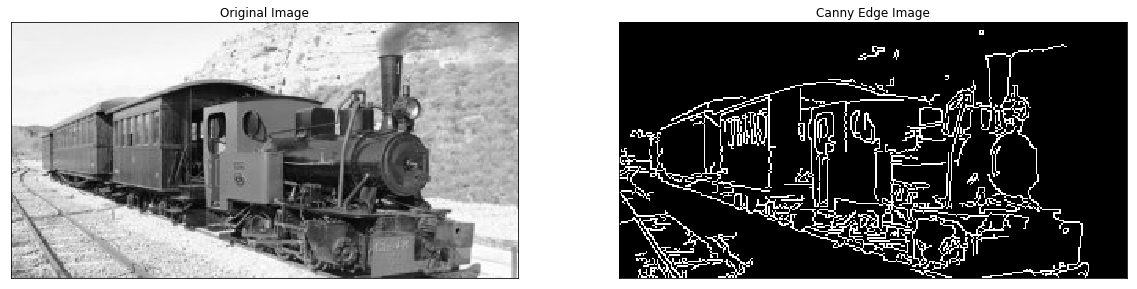

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('tren.jpg',0)
edges = cv2.Canny(img,100,500)
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()